### Import Library and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Car Price Prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

### Handle Duplicated Rows

In [6]:
duplicates_id = df.duplicated(subset='ID', keep=False)
duplicated_rows = df[duplicates_id]
duplicated_rows_sorted = duplicated_rows.sort_values(by='ID')
duplicated_rows_sorted

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5754,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
7269,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
1107,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
6732,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
9990,41770767,11917,-,NISSAN,Murano,2004,Jeep,Yes,CNG,3.5,233600 km,6.0,Variator,4x4,04-May,Left wheel,Silver,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15880,45815564,9408,-,MERCEDES-BENZ,E 240,2000,Sedan,No,Petrol,2.4,252000 km,6.0,Manual,Rear,04-May,Left wheel,Black,4
14469,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
3756,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
8730,45816384,49237,730,HYUNDAI,Tucson,2016,Jeep,Yes,Petrol,1.6,27000 km,4.0,Tiptronic,4x4,04-May,Left wheel,White,12


In [7]:
df_no_duplicates_id = df.drop_duplicates(subset='ID')
df = df_no_duplicates_id
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


### Handle Outliers

In [8]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags'], dtype='object')

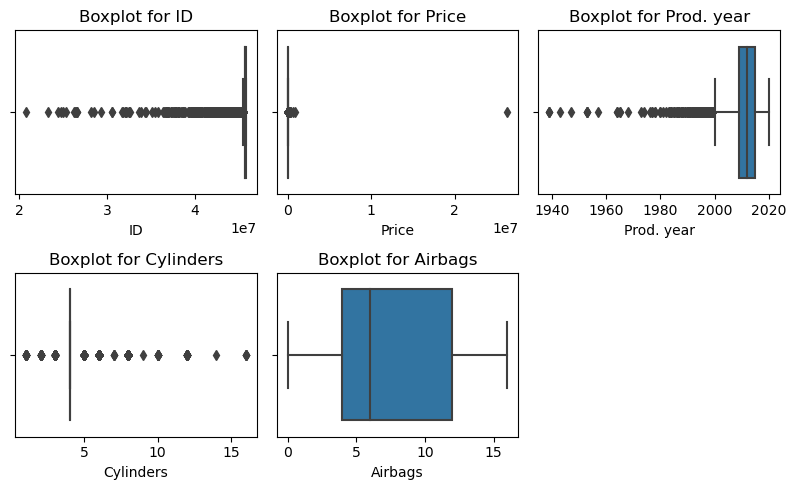

In [9]:
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,5))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title('Boxplot for ' + column)

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

In [10]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

outliers = ((df[numerical_columns] < (lower_limit)) | (df[numerical_columns] > (upper_limit))).any(axis=1)
df = df[~outliers]
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Text(0.5, 1.0, 'Histogram of Price')

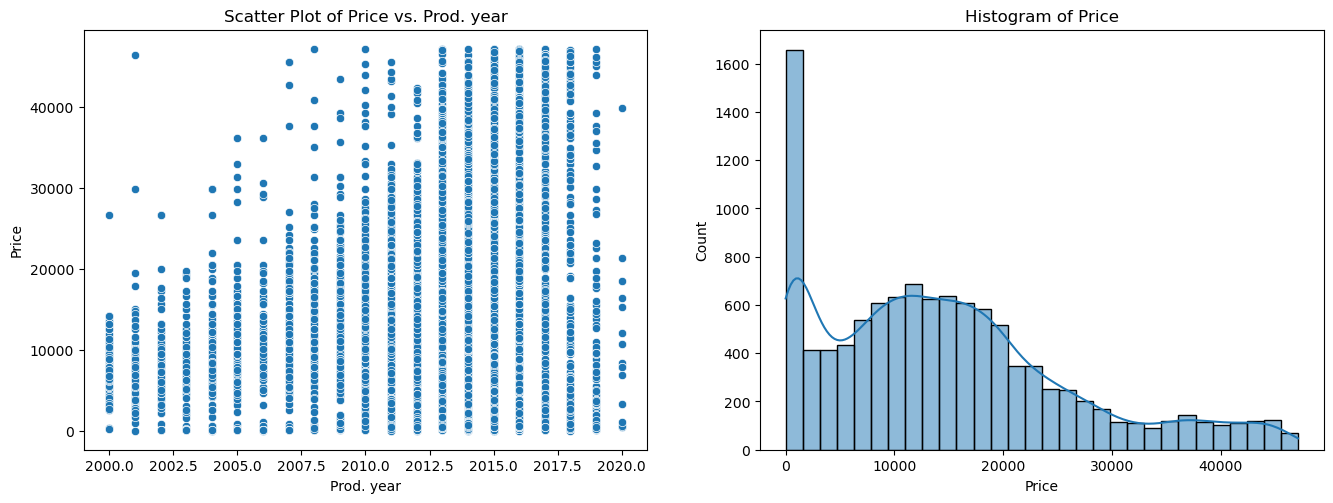

In [11]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Prod. year', y='Price', data=df)
plt.title('Scatter Plot of Price vs. Prod. year')

plt.subplot(2, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Histogram of Price')

### Feature Engineering

In [12]:
df['Mileage'] = df['Mileage'].str.replace('km', '')
df['Mileage'] = df['Mileage'].astype(int)
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [13]:
def categorize_milage(milage):
    if milage < 100000:
        return 'Low'
    elif 100000 <= milage <= 300000:
        return 'Medium'
    else:
        return 'High'

df['Mileage_Category'] = df['Mileage'].apply(categorize_milage)

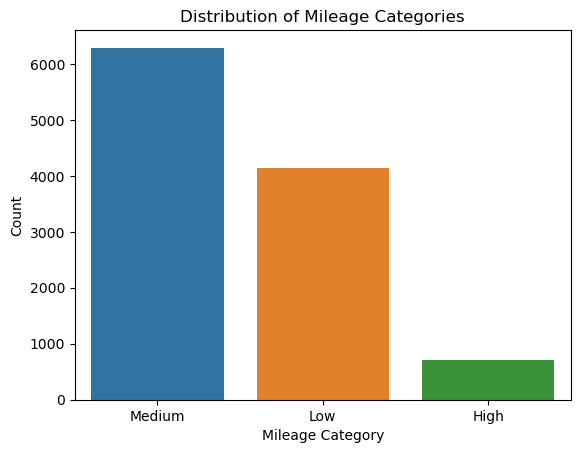

In [14]:
sns.countplot(x='Mileage_Category', data=df)
plt.xlabel('Mileage Category')
plt.ylabel('Count')
plt.title('Distribution of Mileage Categories')
plt.show()

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Mileage_Category
2,45774419,8467,0,17,313,2006,3,0,4,13,200000,4.0,3,1,1,1,1,2,2
3,45769185,3607,308,13,303,2011,4,1,2,36,168966,4.0,0,0,1,0,14,0,2
4,45809263,11726,181,17,313,2014,3,1,4,13,91901,4.0,0,1,1,0,12,4,1
5,45802912,39493,321,18,609,2016,4,1,1,27,160931,4.0,0,1,1,0,14,4,2
6,45656768,1803,280,44,556,2010,3,1,2,23,258909,4.0,0,1,1,0,14,12,2


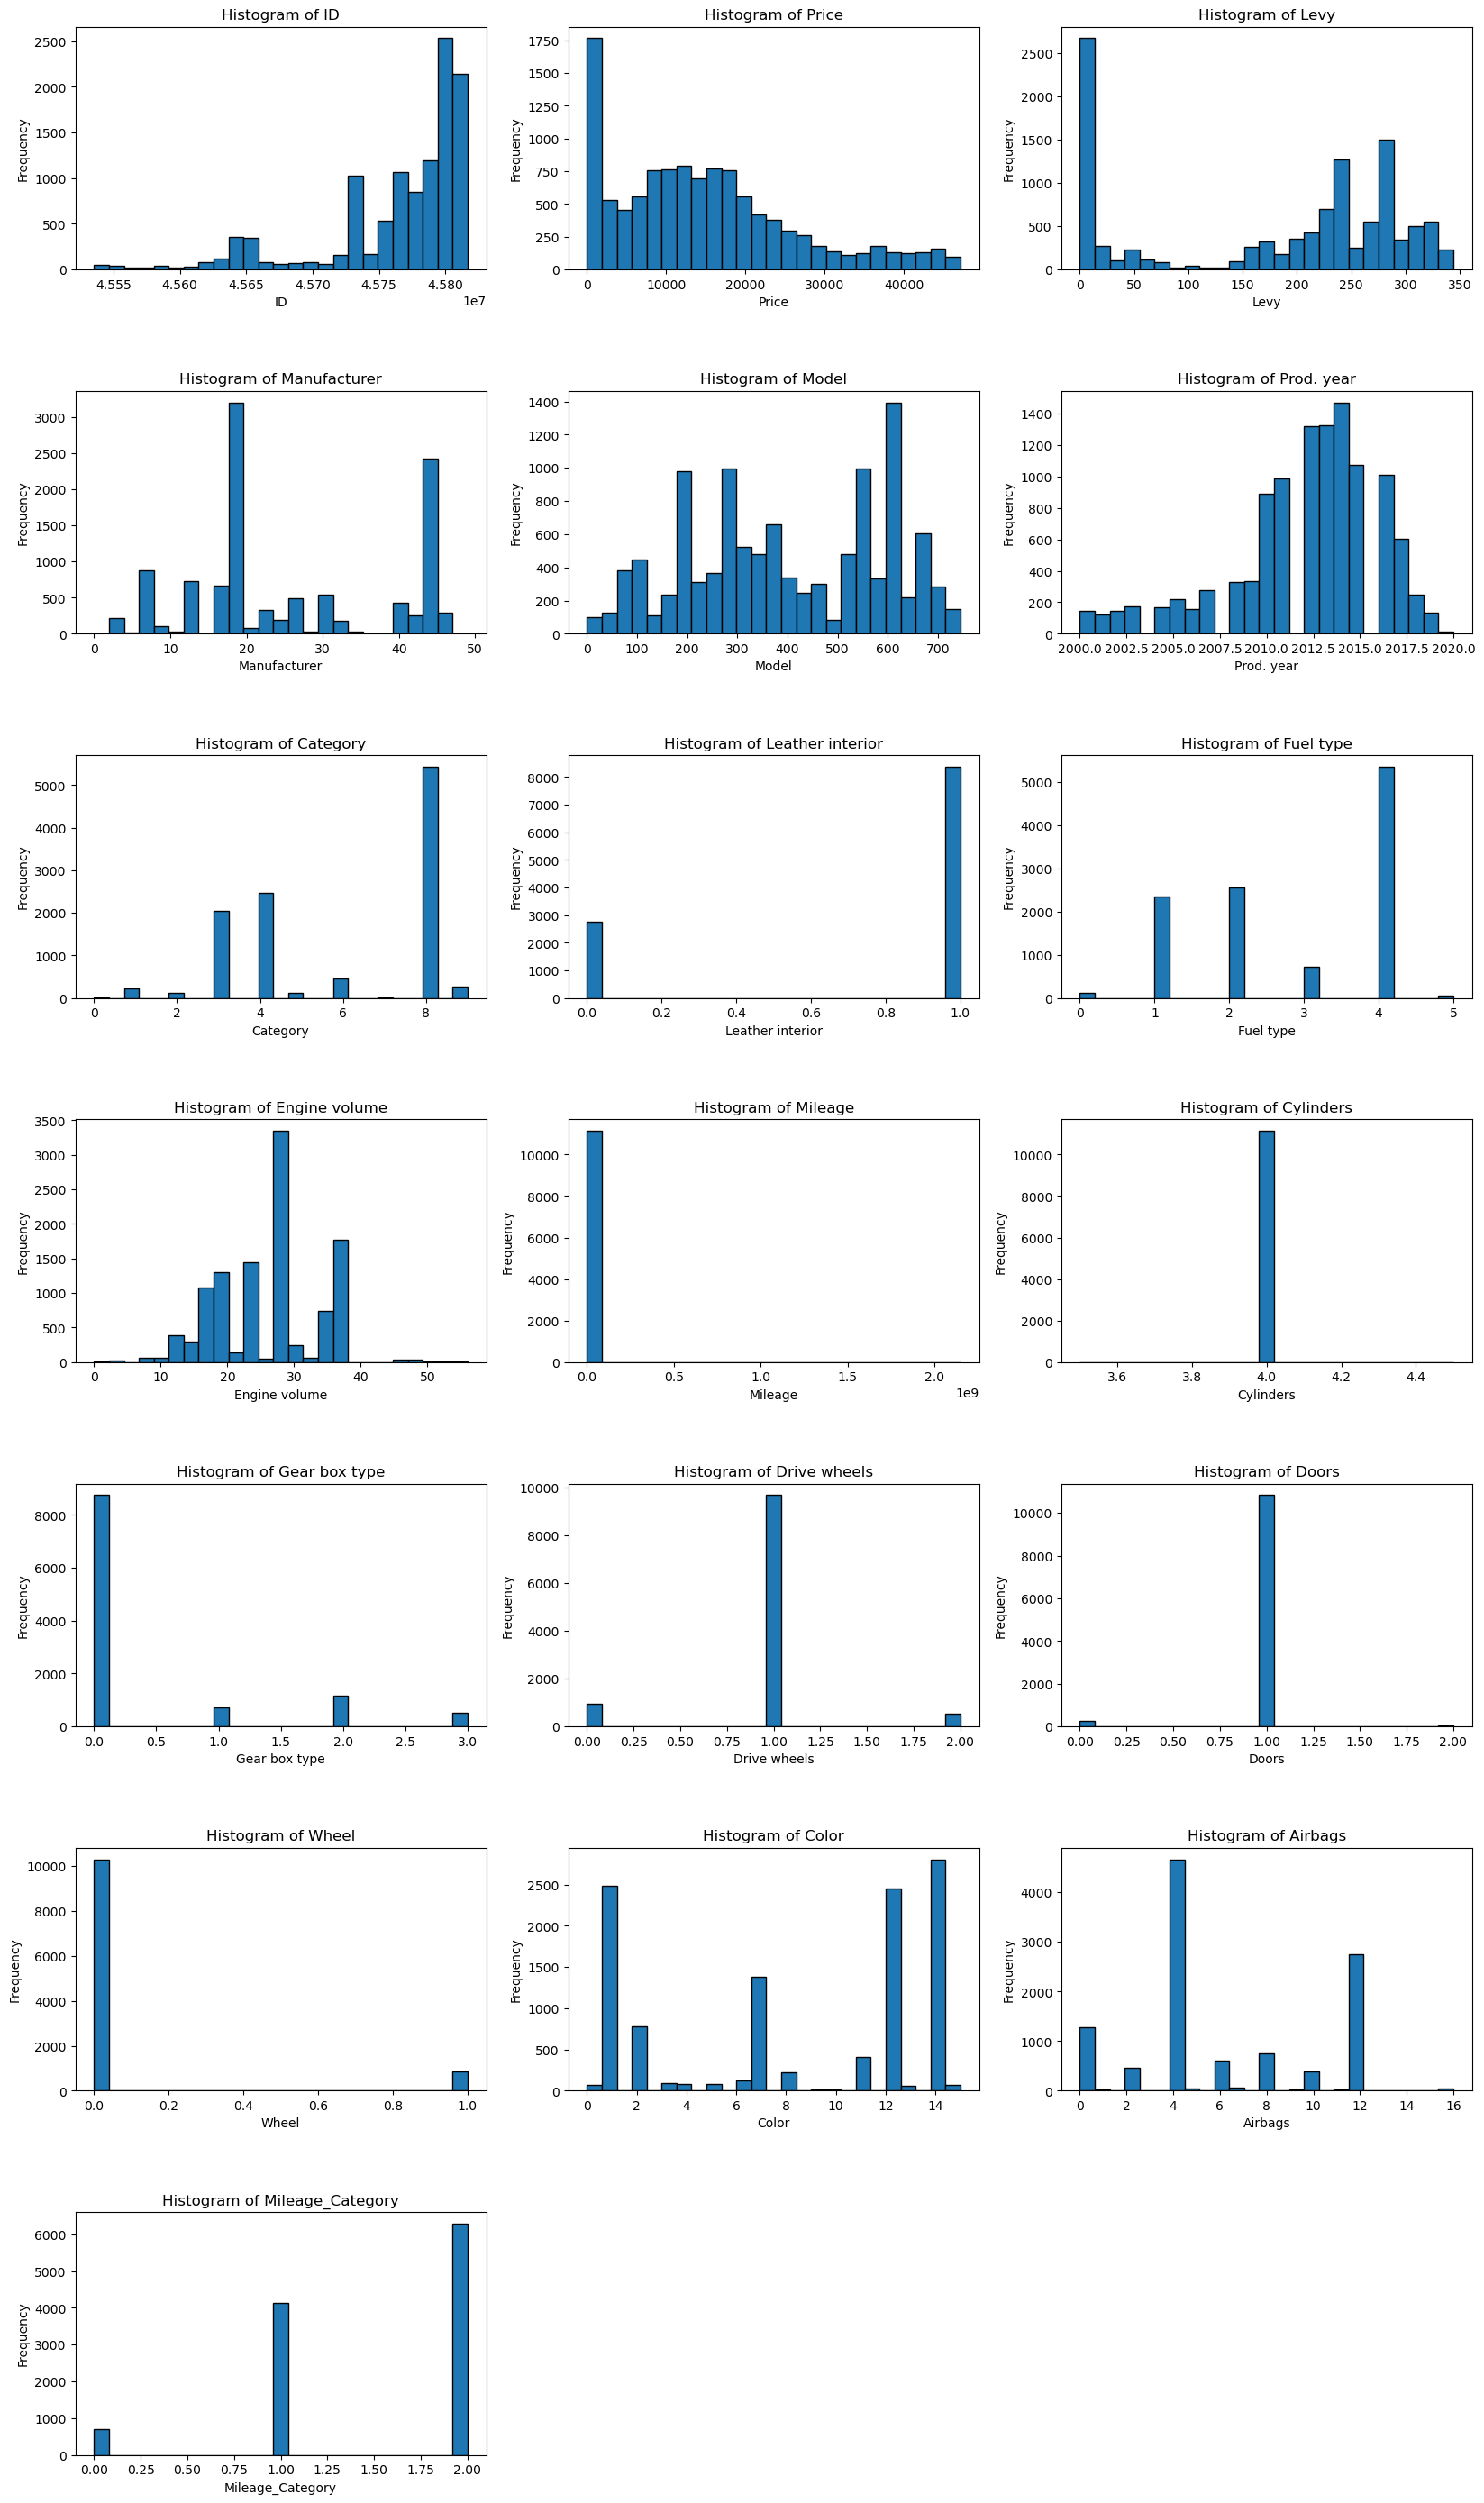

In [16]:
all_columns = df.columns

num_cols = len(all_columns)
num_rows = (num_cols - 1) // 3 + 1

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(all_columns):
    axes[i].hist(df[column], bins=25, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.show()

### Correlation Matrix

In [17]:
correlation_matrix = df.corr()
correlation_matrix

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Mileage_Category
ID,1.000000,0.121260,-0.021920,-0.202398,0.038350,-0.048608,-0.040406,0.047939,0.053275,-0.050714,0.000452,NaN,-0.042903,0.065836,-0.024954,-0.004278,0.020554,-0.058517,-0.011659
Price,0.121260,1.000000,0.063170,-0.065055,0.069072,0.270742,-0.085740,0.057661,-0.208867,0.109495,-0.004457,NaN,0.060660,0.058355,0.027627,-0.152240,0.039265,-0.166779,-0.018131
Levy,-0.021920,0.063170,1.000000,-0.131242,0.046885,0.415798,0.112816,0.436970,-0.041667,0.071754,-0.020528,NaN,-0.308623,-0.001672,0.119923,-0.390754,0.038098,0.022635,-0.088643
Manufacturer,-0.202398,-0.065055,-0.131242,1.000000,-0.027201,-0.095933,-0.087245,-0.186275,-0.064111,0.081693,0.008570,NaN,0.118082,-0.086276,0.033884,0.093919,0.005064,0.255273,0.032267
Model,0.038350,0.069072,0.046885,-0.027201,1.000000,-0.038869,-0.115240,-0.029890,-0.171514,0.015708,0.017824,NaN,-0.028007,-0.067009,0.039443,-0.032557,0.076904,-0.147243,-0.022889
Prod. year,-0.048608,0.270742,0.415798,-0.095933,-0.038869,1.000000,0.189071,0.432313,0.063471,0.098210,-0.025579,NaN,-0.233371,-0.012477,0.133137,-0.394894,-0.035632,0.213756,-0.219824
Category,-0.040406,-0.085740,0.112816,-0.087245,-0.115240,0.189071,1.000000,0.147541,0.178031,0.236452,-0.003175,NaN,-0.048615,0.110772,0.179151,-0.163049,-0.032630,0.161025,-0.107658
Leather interior,0.047939,0.057661,0.436970,-0.186275,-0.029890,0.432313,0.147541,1.000000,-0.064273,0.199867,-0.032493,NaN,-0.397639,0.021483,0.092552,-0.386467,-0.020584,0.041415,-0.121197
Fuel type,0.053275,-0.208867,-0.041667,-0.064111,-0.171514,0.063471,0.178031,-0.064273,1.000000,-0.151692,-0.010577,NaN,0.098993,-0.132625,-0.031990,0.102933,-0.111616,0.163478,-0.072814
Engine volume,-0.050714,0.109495,0.071754,0.081693,0.015708,0.098210,0.236452,0.199867,-0.151692,1.000000,0.003701,NaN,-0.077626,-0.046332,0.055229,-0.234685,-0.036218,0.170566,-0.008269


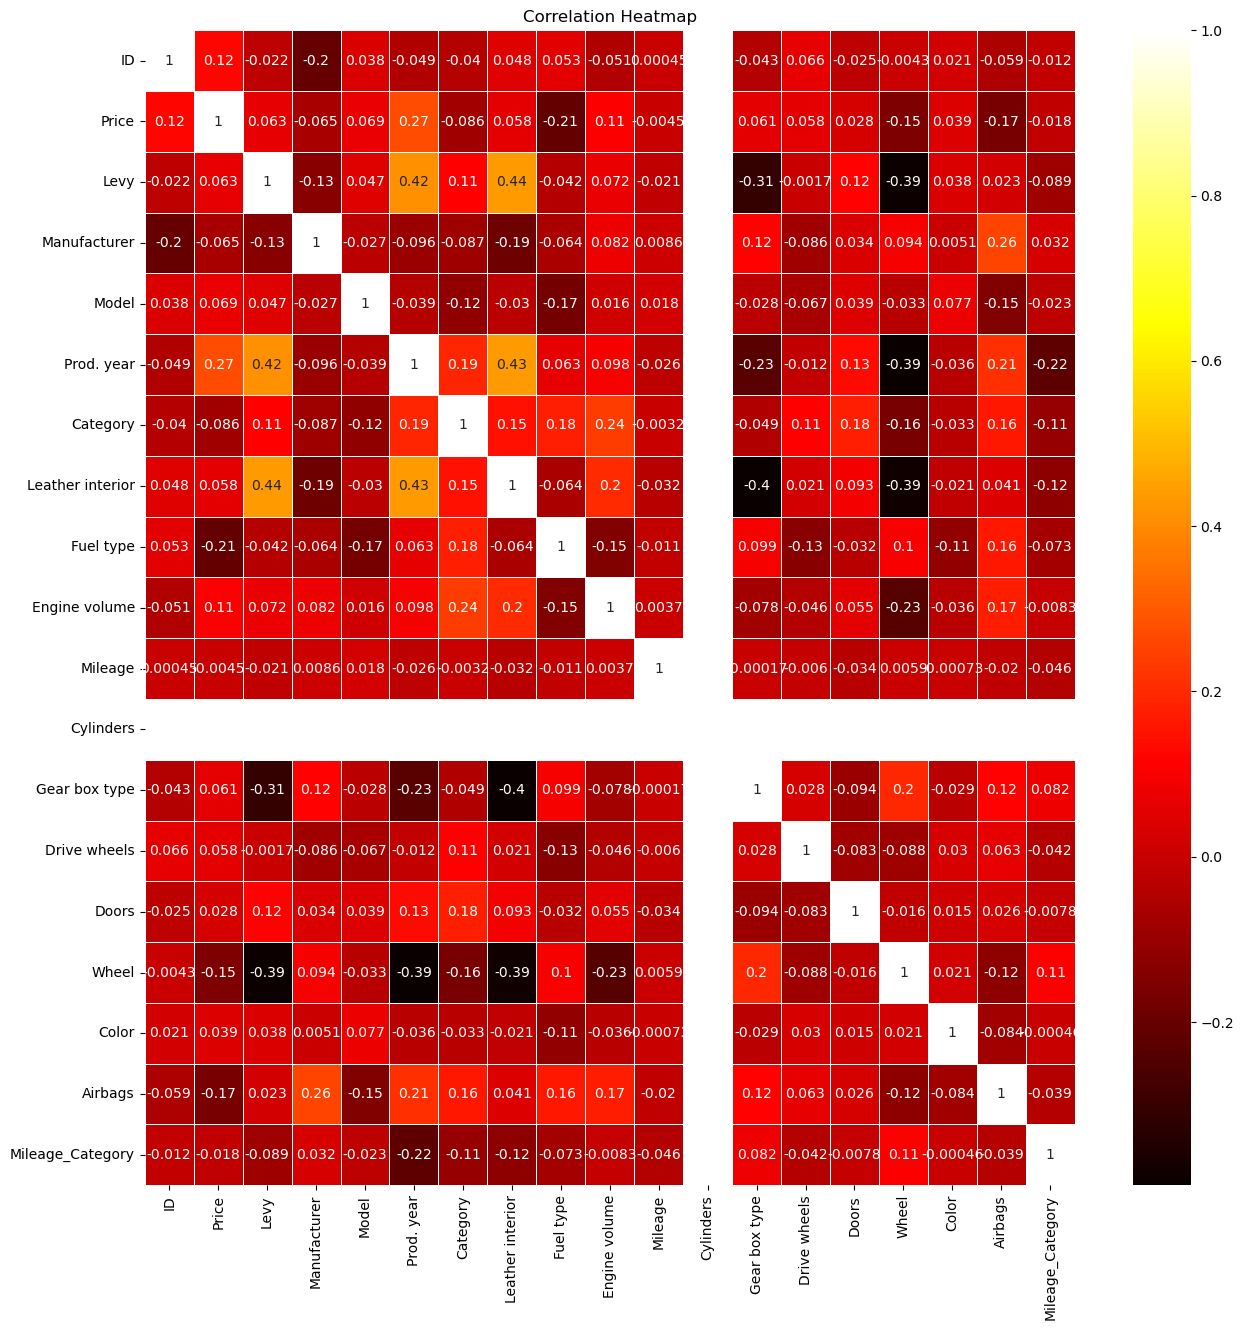

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

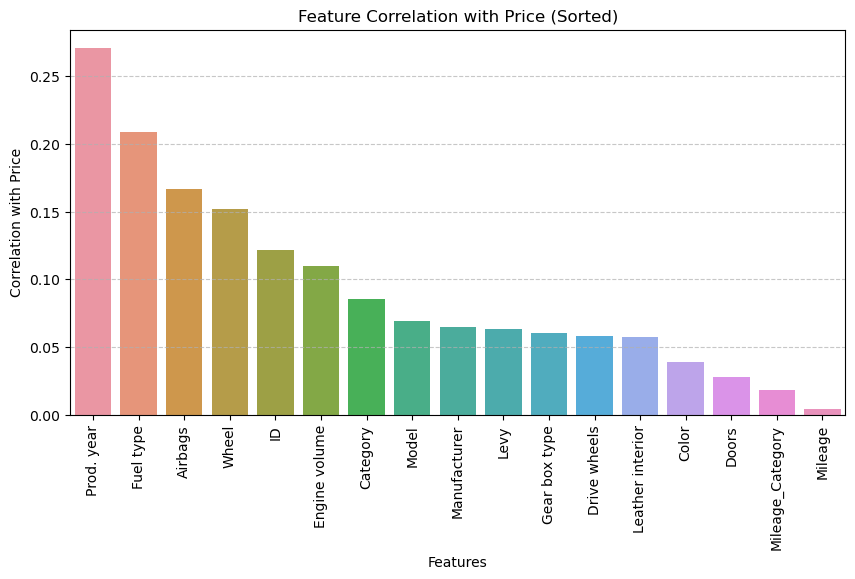

In [19]:
price_correlations = correlation_matrix['Price'].drop('Price').dropna()

price_correlations_sorted = price_correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=price_correlations_sorted.index, y=price_correlations_sorted.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with Price")
plt.title("Feature Correlation with Price (Sorted)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Train

In [20]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor())
]

predictions = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((model_name, y_pred))


for model_name, y_pred in predictions:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('Model: ',model_name)
    print('Mean Squared Error: ', mse)
    print('R2 Score: ', r2 ,'\n')

Model:  Random Forest
Mean Squared Error:  24363379.860638194
R2 Score:  0.823865595721797 

Model:  Linear Regression
Mean Squared Error:  100884235.26602086
R2 Score:  0.2706601144305597 

Model:  Gradient Boosting
Mean Squared Error:  40189971.657860294
R2 Score:  0.7094476728431365 

Model:  Ridge Regression
Mean Squared Error:  100884465.7134714
R2 Score:  0.27065844841686826 

Model:  Lasso Regression
Mean Squared Error:  100884748.67611927
R2 Score:  0.2706564027459596 

Model:  Decision Tree
Mean Squared Error:  45033336.9524237
R2 Score:  0.6744326927484452 



Since the Random Forest model achieved the highest R² score of 0.82, I have decided to use Random Forest as the final model due to its superior performance in capturing the variance within the dataset.

### Test Model

In [22]:
X.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Mileage_Category'],
      dtype='object')

In [23]:
selected_features = ['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
                     'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
                     'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel',
                     'Color', 'Airbags']

categorical_columns = ['Manufacturer', 'Model', 'Category', 'Leather interior',
                       'Fuel type', 'Gear box type', 'Drive wheels', 'Doors',
                       'Wheel', 'Color']

X_train = X_train[selected_features]

# Encode with handle_unknown
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
# Input new Data
input_data = pd.DataFrame({
    'Levy': [1077],
    'Manufacturer': ['HONDA'],
    'Model': ['RX 450'],
    'Prod. year': [2000],
    'Category': ['Jeep'],
    'Leather interior': ['Yes'],
    'Fuel type': ['Hybrid'],
    'Engine volume': [3.5],
    'Mileage': [1805],
    'Cylinders': [6],
    'Gear box type': ['Automatic'],
    'Drive wheels': ['4x4'],
    'Doors': ['4-May'],
    'Wheel': ['Left wheel'],
    'Color': ['Silver'],
    'Airbags': [12]
})

input_data = input_data[selected_features]

# Encode category
input_data[categorical_columns] = encoder.transform(input_data[categorical_columns])

# Price Predict
predicted_price = rf_model.predict(input_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 9514.97


In [25]:
# Input new Data
input_data = pd.DataFrame({
    'Levy': [1399],
    'Manufacturer': ['HYUNDAI'],
    'Model': ['RX 350'],
    'Prod. year': [2020],
    'Category': ['Jeep'],
    'Leather interior': ['Yes'],
    'Fuel type': ['Hybrid'],
    'Engine volume': [3.5],
    'Mileage': [18050],
    'Cylinders': [6],
    'Gear box type': ['Automatic'],
    'Drive wheels': ['4x4'],
    'Doors': ['4-May'],
    'Wheel': ['Left wheel'],
    'Color': ['Silver'],
    'Airbags': [12]
})

input_data = input_data[selected_features]

# Encode category
input_data[categorical_columns] = encoder.transform(input_data[categorical_columns])

# Price Predict
predicted_price = rf_model.predict(input_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 26203.14
